Basic info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diabetic          1000 non-null   int64  
 1   AlcoholLevel      1000 non-null   float64
 2   HeartRate         1000 non-null   int64  
 3   BloodOxygenLevel  1000 non-null   float64
 4   BodyTemperature   1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   MRI_Delay         1000 non-null   float64
 7   Dementia          1000 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 62.6 KB
None
summary stats
          Diabetic  AlcoholLevel    HeartRate  BloodOxygenLevel  \
count  1000.000000   1000.000000  1000.000000       1000.000000   
mean      0.513000      0.098429    79.383000         95.226051   
std       0.500081      0.058715    12.107556          2.929262   
min       0.000000      0.000414    60.000000         90.010677   
25%      

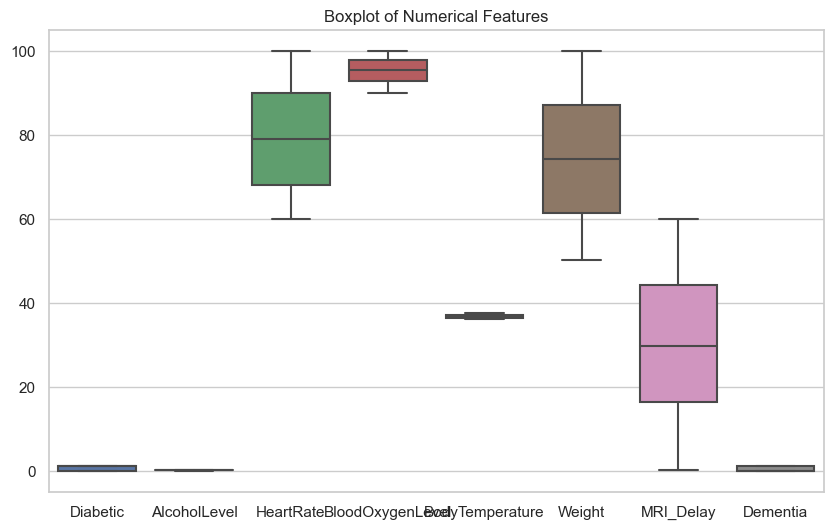

In [66]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Loading dataset
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\dementia pred dataset\health_dementia_data.csv")

# Display info
print("Basic info")
print(df.info())

# Display summary statistics
print("summary stats")
print(df.describe())

# Check for missing values
print("missing values check")
print(df.isnull().sum())

# Visualize the distribution of numerical features
print("visualise distribution of numerical features")
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

#Boxplot for numerical columns
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))

plt.title('Boxplot of Numerical Features')
plt.show()


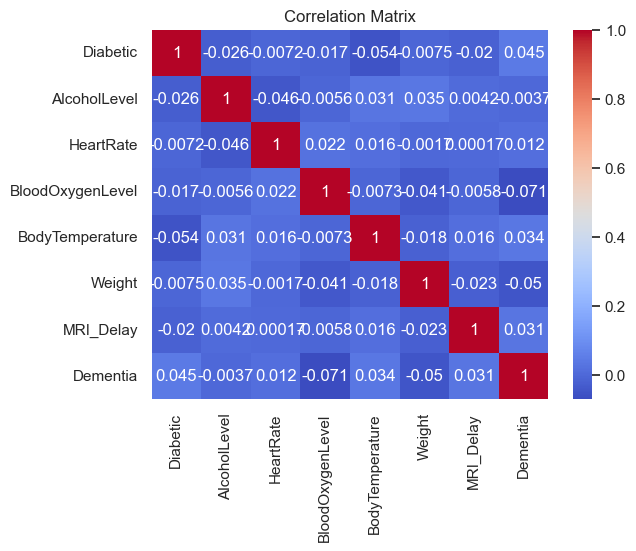

In [46]:
#Corelation Matrix to see the relation between parameters
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


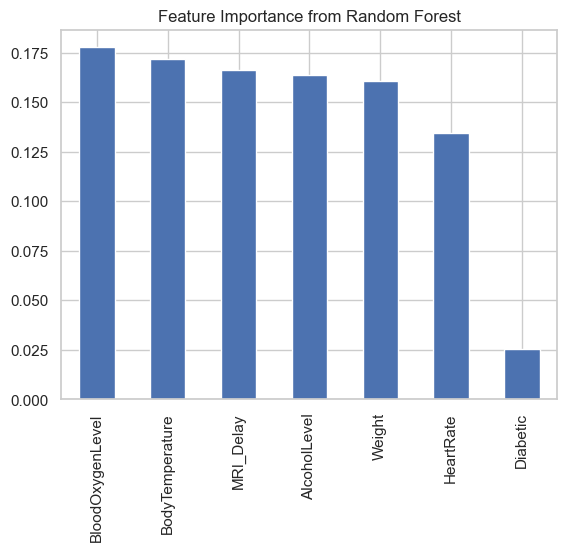

In [47]:
#Choosing important/most significant feature 

X = df.drop("Dementia", axis=1)
y = df["Dementia"]

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.show()


In [48]:
#Uisng ANOVA methods and using p value to determine significance

from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k='all').fit(X, y)

# Transform the features and store them in a DataFrame
X_selected = pd.DataFrame(X_new.transform(X), columns=X.columns[X_new.get_support()])

# Display scores and p-values
scores = pd.DataFrame({'Feature': X_selected.columns, 'Score': X_new.scores_, 'P-value': X_new.pvalues_})
print(scores)


            Feature     Score   P-value
0          Diabetic  0.978097  0.322669
1      AlcoholLevel  0.000484  0.982442
2         HeartRate  0.278008  0.598010
3  BloodOxygenLevel  0.459602  0.497810
4   BodyTemperature  0.005830  0.939139
5            Weight  6.907614  0.008583
6         MRI_Delay  9.215304  0.002400


In [67]:
#priority ranking for features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=1)
fit = rfe.fit(X, y)

ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print(ranking_df.sort_values(by='Ranking'))


            Feature  Ranking
0          Diabetic        1
4   BodyTemperature        2
3  BloodOxygenLevel        3
5            Weight        4
6         MRI_Delay        5
2         HeartRate        6
1      AlcoholLevel        7


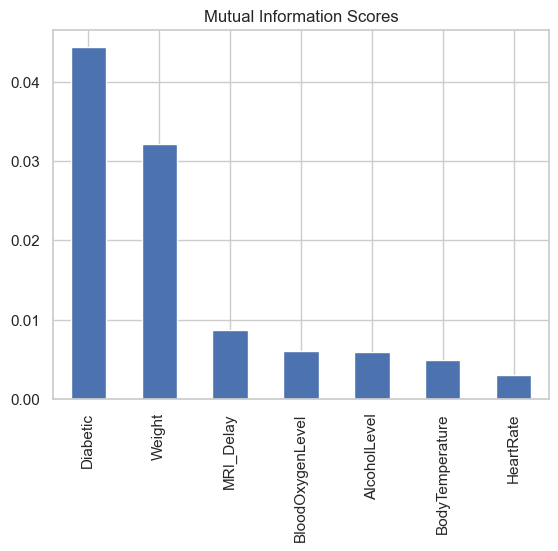

In [50]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False).plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()


In [51]:
#splitting the dataset to train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [52]:
#Checking for logistic Regression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.48
Precision: 0.51
Recall: 0.37
F1 Score: 0.43


In [53]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Model:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")


Decision Tree Model:
Accuracy: 0.50
Precision: 0.53
Recall: 0.55
F1 Score: 0.54


In [54]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")


Random Forest Model:
Accuracy: 0.51
Precision: 0.54
Recall: 0.43
F1 Score: 0.48


In [55]:
#SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Create and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Support Vector Machines (SVM) Model:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")


Support Vector Machines (SVM) Model:
Accuracy: 0.48
Precision: 0.67
Recall: 0.06
F1 Score: 0.10


In [ ]:
##comparing the analysis of metrics given by 4 different models
##We can conclude that Random Forest and Decision Tree can be chosen to apply to get accurate results
##The accuracy being 0.50+ can be improvised with right data set.

In [56]:
#Cross validation of the chosen models

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='f1')
print(f"Random Forest Cross-Validation F1 Score: {rf_scores.mean():.2f} (+/- {rf_scores.std():.2f})")

dt_scores = cross_val_score(dt_model, X, y, cv=kfold, scoring='f1')
print(f"Decision Tree Cross-Validation F1 Score: {dt_scores.mean():.2f} (+/- {dt_scores.std():.2f})")


Random Forest Cross-Validation F1 Score: 0.51 (+/- 0.01)
Decision Tree Cross-Validation F1 Score: 0.51 (+/- 0.05)


In [57]:
#Hyper parameterizing Decision Tree

dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

from sklearn.model_selection import GridSearchCV

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid=dt_param_grid,
                              scoring='f1',
                              cv=5,
                              verbose=1,
                              n_jobs=-1)

dt_grid_search.fit(X, y)

best_dt_params = dt_grid_search.best_params_
print("Best Decision Tree Hyperparameters:", best_dt_params)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Decision Tree Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [58]:
#Hyper parameterizing Random Forest

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              scoring='f1',
                              cv=5,
                              verbose=1,
                              n_jobs=-1)

rf_grid_search.fit(X, y)

best_rf_params = rf_grid_search.best_params_
print("Best Random Forest Hyperparameters:", best_rf_params)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [68]:
#Tuned models

best_dt_model = DecisionTreeClassifier(**best_dt_params, random_state=42)
best_dt_model.fit(X, y)

best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf_model.fit(X, y)

# Print results for Decision Tree
dt_tuned_scores = cross_val_score(best_dt_model, X, y, cv=5, scoring='f1')
print(f"Tuned Decision Tree F1 Score: {dt_tuned_scores.mean():.2f} (+/- {dt_tuned_scores.std():.2f})")

# Print results for Random Forest
rf_tuned_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='f1')
print(f"Tuned Random Forest F1 Score: {rf_tuned_scores.mean():.2f} (+/- {rf_tuned_scores.std():.2f})")


Tuned Decision Tree F1 Score: 0.52 (+/- 0.04)
Tuned Random Forest F1 Score: 0.51 (+/- 0.02)


In [60]:
dt_tuned_scores = cross_val_score(best_dt_model, X, y, cv=5, scoring='f1')
rf_tuned_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='f1')

print(f"Tuned Decision Tree F1 Score: {dt_tuned_scores.mean():.2f} (+/- {dt_tuned_scores.std():.2f})")
print(f"Tuned Random Forest F1 Score: {rf_tuned_scores.mean():.2f} (+/- {rf_tuned_scores.std():.2f})")


Tuned Decision Tree F1 Score: 0.52 (+/- 0.04)
Tuned Random Forest F1 Score: 0.51 (+/- 0.02)


In [61]:
from joblib import dump

# Save the best models after hyperparameter tuning
dump(best_dt_model, 'best_decision_tree_model.joblib')


['best_decision_tree_model.joblib']

In [62]:
dump(best_rf_model, 'best_random_forest_model.joblib')


['best_random_forest_model.joblib']

In [63]:
!jupyter nbconvert --to script Dementia_model_training.ipynb


[NbConvertApp] Converting notebook Dementia_model_training.ipynb to script
[NbConvertApp] Writing 9460 bytes to Dementia_model_training.py


In [65]:
from joblib import dump

dump(X, 'X.joblib')

['X.joblib']